# Imports

In [64]:
# Importing all the necessary files
import numpy as npy
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,Dropout
import tensorflow.keras.utils
import seaborn as sns
import os
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import losses
import matplotlib.pyplot as plt

# Data Preprocessing

In [65]:
# Preprocessing
# Reading the data from the CSV file 
# The data in the file normalised ( This is the reason of negative value)

data1 = pd.read_csv('kidney_1.csv') 
data0 = pd.read_csv('kidney_0.csv')
corr_data = pd.concat([data1,data0])
classi_1 = []
classi_0 = []
for i in range(40):
    classi_1.append(1)
for i in range(20):
    classi_0.append(0)  

#Converting the arrays in numpy arrays
data1 = npy.array(data1)
classi_1 = npy.array([classi_1])
data0 = npy.array(data0)
classi_0 = npy.array([classi_0])

#preparing final data sets for processing in neural network

final_data = npy.concatenate((data1,data0),axis=0)
final_label = npy.concatenate((classi_1,classi_0),axis = 1)
final_label = npy.transpose(final_label)

final_combine = npy.concatenate((final_data,final_label),axis=1) # concating labels and features

#randomising the sequence of data for test and train sets
final_combine = npy.take(final_combine,npy.random.permutation(final_combine.shape[0]),axis=0,out=final_combine)

final_data = final_combine[:,:7]
final_label = final_combine[:,7:8]

#To see the data uncomment the lines below

#print(final_data.shape)
#print(final_combine)

# Data Visualtisation

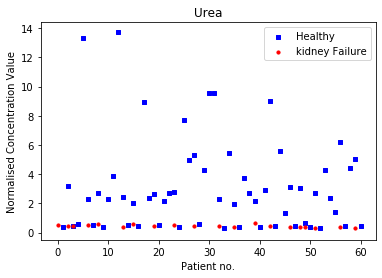

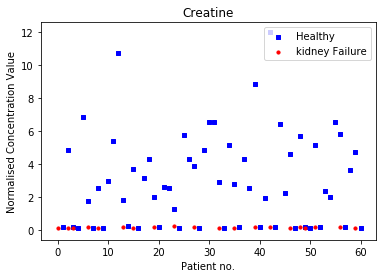

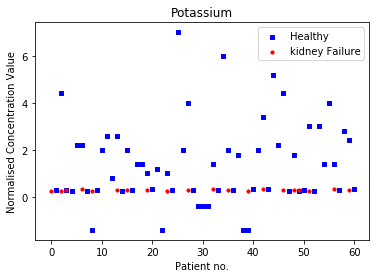

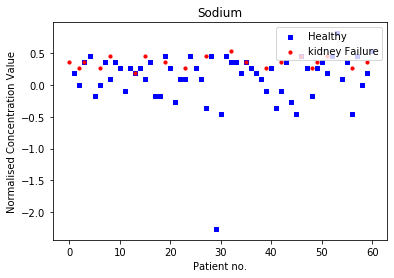

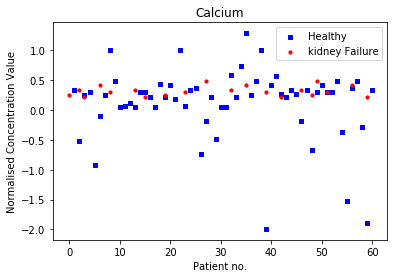

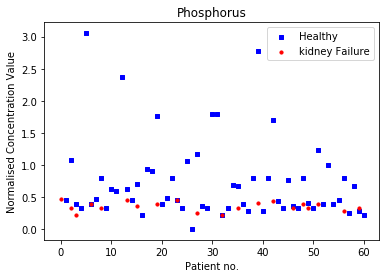

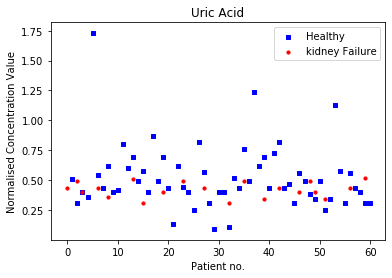

In [73]:
#Visualisation of the data or features of patients 

x = npy.linspace(1,60,60)
plotData = []

j =1
for i in range(60):
    if (final_combine[i,7] == 0):
        plotData.append(i)
        j = j+1
#print(plotData)

# Data visualisation of urea
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.scatter(x,final_combine[:,0], s=10, c='b', marker="s", label='Healthy')
ax1.scatter(plotData,data0[:,0], s=10, c='r', marker="o", label='kidney Failure')
plt.legend(loc='upper right');
ax1.set_title('Urea')
ax1.set_xlabel('Patient no.')
ax1.set_ylabel('Normalised Concentration Value')
plt.show()

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.scatter(x,final_combine[:,1], s=10, c='b', marker="s", label='Healthy')
ax2.scatter(plotData,data0[:,1], s=10, c='r', marker="o", label='kidney Failure')
plt.legend(loc='upper right');
ax2.set_title('Creatine')
ax2.set_xlabel('Patient no.')
ax2.set_ylabel('Normalised Concentration Value')
plt.show()

# Data visualisation of Potassium
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
ax3.scatter(x,final_combine[:,2], s=10, c='b', marker="s", label='Healthy')
ax3.scatter(plotData,data0[:,2], s=10, c='r', marker="o", label='kidney Failure')
plt.legend(loc='upper right');
ax3.set_title('Potassium')
ax3.set_xlabel('Patient no.')
ax3.set_ylabel('Normalised Concentration Value')
plt.show()

# Data visualisation of Sodium
fig4 = plt.figure()
ax4 = fig4.add_subplot(111)
ax4.scatter(x,final_combine[:,3], s=10, c='b', marker="s", label='Healthy')
ax4.scatter(plotData,data0[:,3], s=10, c='r', marker="o", label='kidney Failure')
plt.legend(loc='upper right');
ax4.set_title('Sodium')
ax4.set_xlabel('Patient no.')
ax4.set_ylabel('Normalised Concentration Value')
plt.show()

# Data visualisation of Calcium
fig5 = plt.figure()
ax5 = fig5.add_subplot(111)
ax5.scatter(x,final_combine[:,4], s=10, c='b', marker="s", label='Healthy')
ax5.scatter(plotData,data0[:,4], s=10, c='r', marker="o", label='kidney Failure')
plt.legend(loc='upper right');
ax5.set_title('Calcium')
ax5.set_xlabel('Patient no.')
ax5.set_ylabel('Normalised Concentration Value')
plt.show()

# Data visualisation of Phosphorus
fig6 = plt.figure()
ax6 = fig6.add_subplot(111)
ax6.scatter(x,final_combine[:,5], s=10, c='b', marker="s", label='Healthy')
ax6.scatter(plotData,data0[:,5], s=10, c='r', marker="o", label='kidney Failure')
plt.legend(loc='upper right');
ax6.set_title('Phosphorus')
ax6.set_xlabel('Patient no.')
ax6.set_ylabel('Normalised Concentration Value')
plt.show()

# Data visualisation of Uric acid
fig7 = plt.figure()
ax7 = fig7.add_subplot(111)
ax7.scatter(x,final_combine[:,6], s=10, c='b', marker="s", label='Healthy')
ax7.scatter(plotData,data0[:,6], s=10, c='r', marker="o", label='kidney Failure')
plt.legend(loc='upper right');
ax7.set_title('Uric Acid')
ax7.set_xlabel('Patient no.')
ax7.set_ylabel('Normalised Concentration Value')
plt.show()


# Spilting the data into train and test sets

In [93]:
# Splitting the data into train and test sets

x_train,x_test,y_train,y_test = train_test_split(final_data,final_label,test_size=0.8)

# Correlation Heatmap

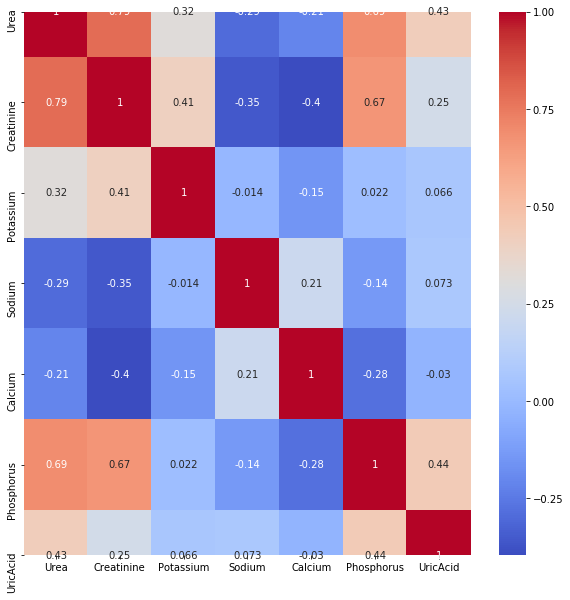

In [94]:
corelation = corr_data.corr()
plt.figure(figsize=(10,10))
#print(corr_data)
dataplot = sns.heatmap(corr_data.corr(), cmap="coolwarm", annot=True)

# Neural Network model

In [95]:
model=Sequential()
model.add(Dense(7,input_shape=(7,),activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(2,activation='softmax'))
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 7)                 56        
_________________________________________________________________
dense_19 (Dense)             (None, 6)                 48        
_________________________________________________________________
dense_20 (Dense)             (None, 2)                 14        
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________
None


In [96]:
## setting parameters
model.compile(Adam(learning_rate=0.002, beta_1=0.9, beta_2=0.999),loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

# Training the Data 

In [97]:
model.fit(x_train,y_train,batch_size=2,epochs = 100, shuffle = True,verbose=2)

Train on 12 samples
Epoch 1/100
12/12 - 1s - loss: 0.3492 - accuracy: 0.7500
Epoch 2/100
12/12 - 0s - loss: 0.3135 - accuracy: 0.7500
Epoch 3/100
12/12 - 0s - loss: 0.2958 - accuracy: 0.7500
Epoch 4/100
12/12 - 0s - loss: 0.2732 - accuracy: 0.7500
Epoch 5/100
12/12 - 0s - loss: 0.2603 - accuracy: 0.7500
Epoch 6/100
12/12 - 0s - loss: 0.2459 - accuracy: 0.7500
Epoch 7/100
12/12 - 0s - loss: 0.2301 - accuracy: 0.7500
Epoch 8/100
12/12 - 0s - loss: 0.2209 - accuracy: 0.7500
Epoch 9/100
12/12 - 0s - loss: 0.2137 - accuracy: 0.7500
Epoch 10/100
12/12 - 0s - loss: 0.2068 - accuracy: 0.7500
Epoch 11/100
12/12 - 0s - loss: 0.2023 - accuracy: 0.7500
Epoch 12/100
12/12 - 0s - loss: 0.1951 - accuracy: 0.7500
Epoch 13/100
12/12 - 0s - loss: 0.1900 - accuracy: 0.9167
Epoch 14/100
12/12 - 0s - loss: 0.1853 - accuracy: 1.0000
Epoch 15/100
12/12 - 0s - loss: 0.1803 - accuracy: 1.0000
Epoch 16/100
12/12 - 0s - loss: 0.1772 - accuracy: 1.0000
Epoch 17/100
12/12 - 0s - loss: 0.1715 - accuracy: 1.0000
Epo

# Testing Neural network model

In [99]:
y_pred = model.predict(x_test)
#print(y_pred)
ans = []
for i in range(len(y_pred)):
    if y_pred[i][0]<y_pred[i][1]:
        ans.append(1)
    else:
        ans.append(0)

#print(ans)        
#print(y_test)
cnt = 0
for i in range(len(y_test)):
    if y_test[i] != ans[i]:
        cnt += 1
#total = len(y_test)
print('Accuracy: ',( (total-cnt)*100) / total)

Accuracy:  100.0
